Name: Pratham Shewale Roll_no: TEBD22618

In [5]:
import pandas as pd

df = pd.read_csv("./Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### 1. List down the features and their types

- Sepal Length : Numeric, Nominal
- Sepal Width : Numeric, Nominal
- Petal Length : Numeric, Nominal
- Petal Width : Numeric, Nominal

In [7]:
df.drop("Id", axis = 1, inplace = True)

#### 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.

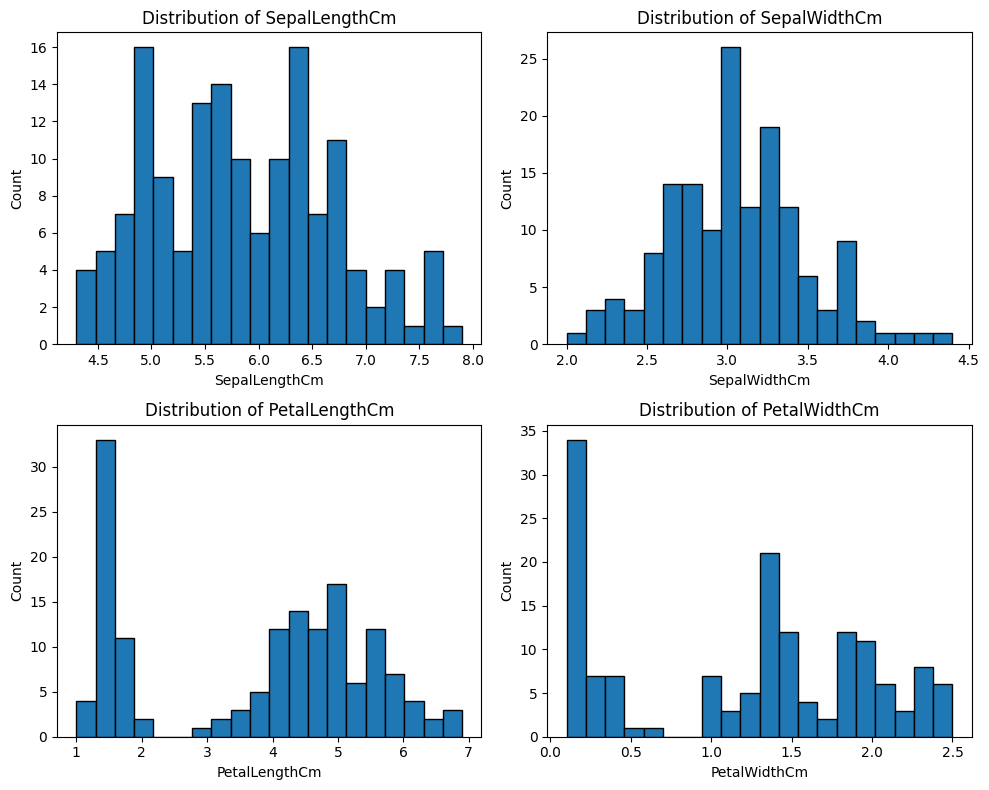

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for each numeric feature
numeric_features = df.columns[:-1]

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, bins=20, alpha=1.0)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


#### 3. Create a boxplot for each feature in the dataset.

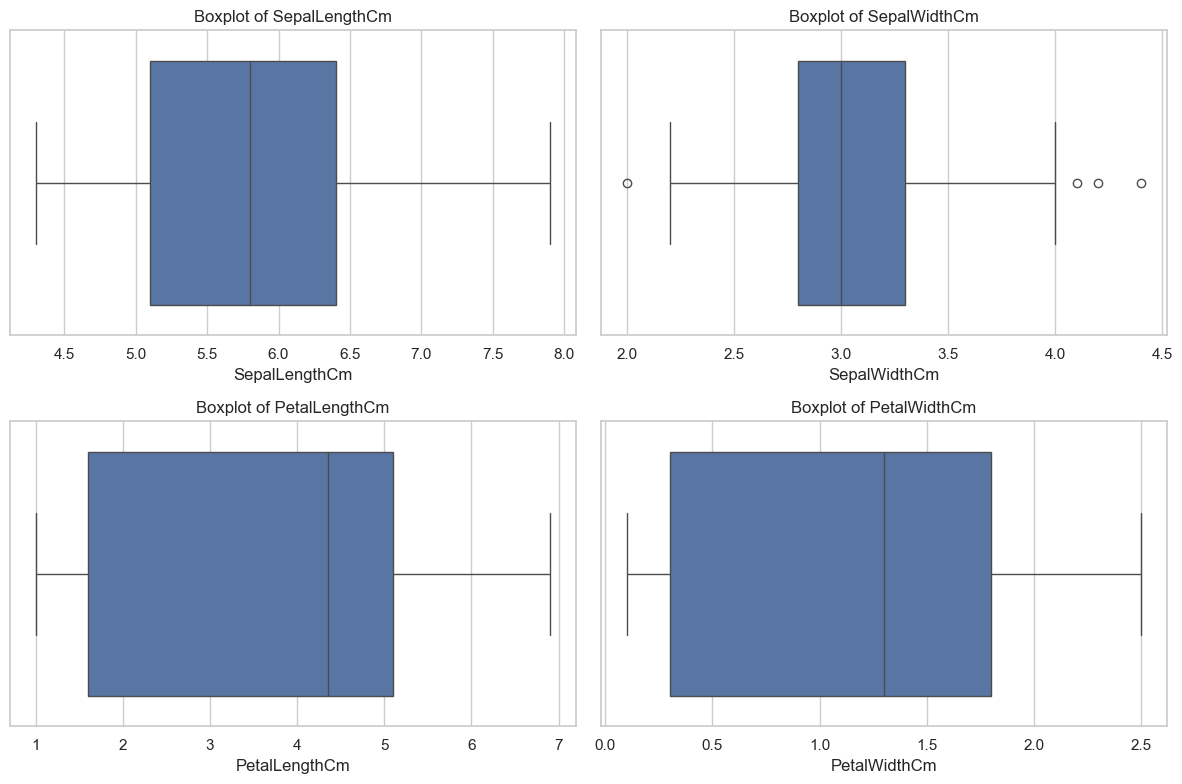

In [9]:
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature], data = df)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

#### 4. Compare distributions and identify outliers.

In [10]:
import numpy as np

print(np.where(df["SepalWidthCm"] > 4.0))
print(np.where(df["SepalWidthCm"] <= 2.0))

(array([15, 32, 33], dtype=int64),)
(array([60], dtype=int64),)


In [11]:
df[df["SepalWidthCm"] > 4.0] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [12]:
df[df["SepalWidthCm"] <= 2.0] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [13]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (150, 5)

Final cleaned data shape: (146, 5)


In [14]:
print(outliers_dict.keys())

dict_keys(['SepalWidthCm'])


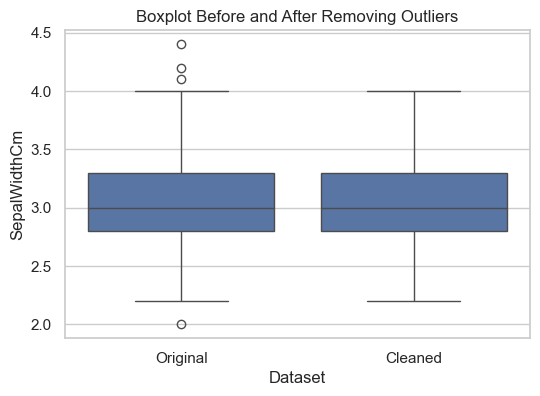

In [15]:
plot_df = pd.DataFrame({
    'SepalWidthCm': pd.concat([
        df['SepalWidthCm'],  # original
        df_clean['SepalWidthCm'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='SepalWidthCm', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()
